# 東京1600m

In [1]:
%run 0.2_function.ipynb

In [2]:
# 2005-2025 東京
df = result_df("2015", "2025", ["東"])

In [3]:
distance = df["距離"] == 1600
ground_type = df["芝・ダ"] == "芝"
# race_class = df["クラスコード"] >= 100
arrival = df["確定着順"] == 1
cond = distance & ground_type & arrival
df = df[cond]

In [4]:
df[
    [
        "レース日",
        "レース名",
        "クラスコード",
        "馬名",
        "走破タイム",
        "上がり3Fタイム",
        "PCI",
        "馬場状態",
        "年齢",
        "騎手名",
        "単勝オッズ",
    ]
].sort_values("走破タイム").head(10)

,レース日,レース名,クラスコード,馬名,走破タイム,上がり3Fタイム,PCI,馬場状態,年齢,騎手名,単勝オッズ
67904,2019-05-12,ヴィクトG1,195,ノームコア,90.5,33.2,53.6,良,4,レーン,9.4
71404,2020-05-17,ヴィクトG1,195,アーモンドアイ,90.6,32.9,55.2,良,5,ルメール,1.4
72440,2019-06-02,安田記念G1,195,インディチャンプ,90.9,32.9,55.8,良,4,福永祐一,19.2
55416,2021-05-16,ヴィクトG1,195,グランアレグリア,91.0,32.6,57.5,良,5,ルメール,1.3
51660,2018-06-03,安田記念G1,195,モズアスコット,91.3,33.3,54.5,良,4,ルメール,15.7
78477,2023-10-21,富士ＳG2,179,ナミュール,91.4,33.8,52.2,良,4,モレイラ,3.8
42648,2023-06-04,安田記念G1,195,ソングライン,91.4,33.1,55.7,良,5,戸崎圭太,7.4
3802,2017-06-04,安田記念G1,195,サトノアラジン,91.5,33.5,53.9,良,6,川田将雅,12.4
27908,2016-05-15,ヴィクトG1,195,ストレイトガール,91.5,33.4,54.4,良,7,戸崎圭太,17.7
68973,2020-06-07,安田記念G1,195,グランアレグリア,91.6,33.7,53.1,稍,4,池添謙一,12.0


In [5]:
# class_code_labels = {
#    7: "未勝利",
#    11: "未出走",
#    15: "新馬",
#    19: "400万下",
#    23: "500万下",
#    39: "900万下",
#    43: "1000万下",
#    63: "1500万下",
#    67: "1600万下",
#    131: "オープン",
#    131: "オープン",
#    147: "重賞",
#    163: "G3",
#    179: "G2",
#    195: "G1",
# }
class_code_labels = {
    7: "その他",
    11: "その他",
    15: "その他",
    19: "その他",
    23: "その他",
    39: "その他",
    43: "その他",
    63: "その他",
    67: "その他",
    131: "オープン",
    131: "オープン",
    147: "重賞",
    163: "重賞",
    179: "重賞",
    195: "G1",
}
df["クラス"] = df["クラスコード"].map(class_code_labels)

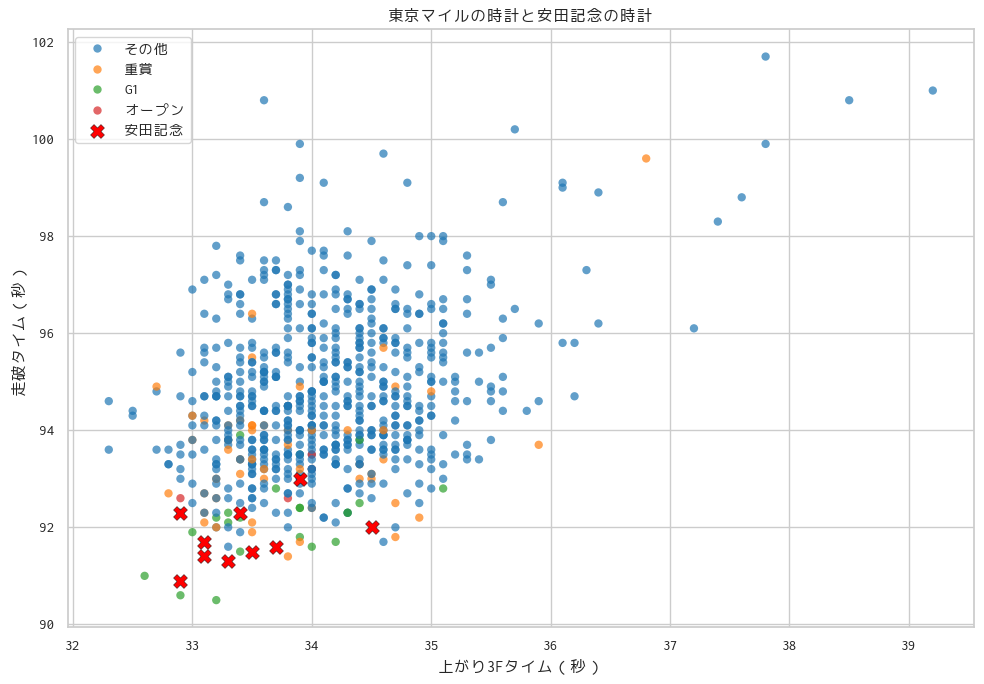

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 数値化と欠損除去（前処理）
cols = ["上がり3Fタイム", "走破タイム"]
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")
df_plot = df.dropna(subset=cols)

# 安田記念とそれ以外に分割
df_yasuda = df_plot[df_plot["レース名"] == "安田記念G1"]
df_others = df_plot[df_plot["レース名"] != "安田記念G1"]

# 描画
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid", font="Ricty Diminished")

# 1) その他のレースを薄めに表示
sns.scatterplot(
    data=df_others,
    x="上がり3Fタイム",
    y="走破タイム",
    alpha=0.7,
    edgecolor="none",
    hue="クラス",
    palette="tab10",  # 任意。カテゴリ数に応じて調整可
)

# 2) 安田記念を強調
sns.scatterplot(
    data=df_yasuda,
    x="上がり3Fタイム",
    y="走破タイム",
    color="red",
    # 点のサイズ
    s=100,
    # マーカーを変える（例: "X", "D", "^"など）
    marker="X",
    edgecolor="black",
    linewidth=0.3,
    label="安田記念",
)

plt.xlabel("上がり3Fタイム（秒）")
plt.ylabel("走破タイム（秒）")
plt.title("東京マイルの時計と安田記念の時計")
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# 2005-2025 東京
df = result_df("2015", "2025", ["東"])
distance = df["距離"] == 1600
ground_type = df["芝・ダ"] == "芝"
race_class = df["クラスコード"] >= 115
arrival = df["確定着順"] == 1
cond = distance & ground_type & arrival & race_class
df = df[cond]

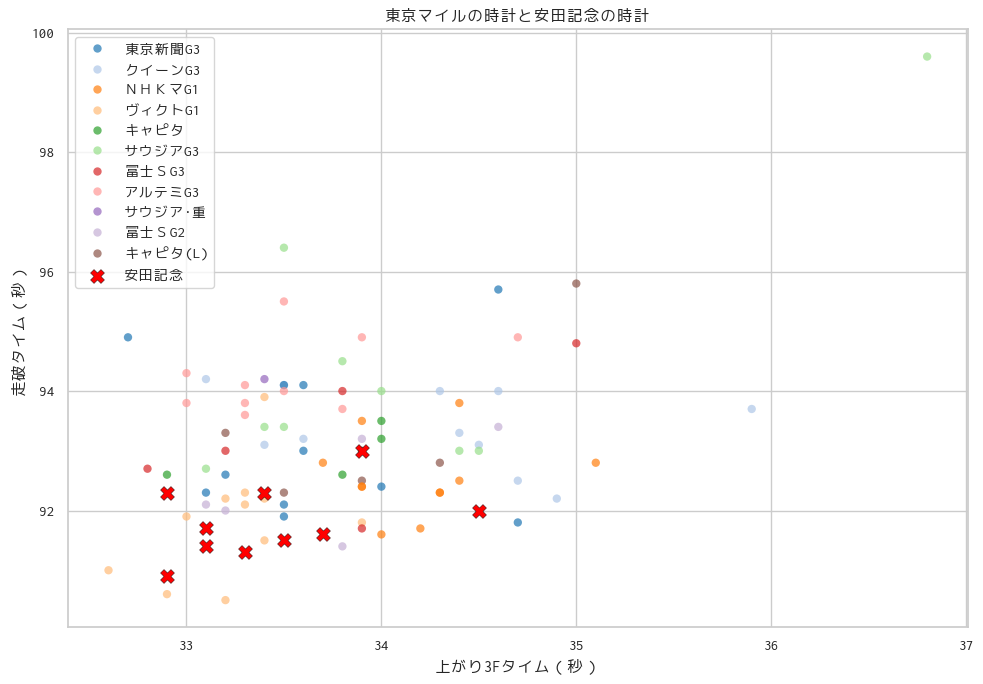

In [8]:
# 数値化と欠損除去（前処理）
cols = ["上がり3Fタイム", "走破タイム"]
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")
df_plot = df.dropna(subset=cols)

# 安田記念とそれ以外に分割
df_yasuda = df_plot[df_plot["レース名"] == "安田記念G1"]
df_others = df_plot[df_plot["レース名"] != "安田記念G1"]

# 描画
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid", font="Ricty Diminished")

# 1) その他のレースを薄めに表示
sns.scatterplot(
    data=df_others,
    x="上がり3Fタイム",
    y="走破タイム",
    alpha=0.7,
    edgecolor="none",
    hue="レース名",
    palette="tab20",  # 任意。カテゴリ数に応じて調整可
)

# 2) 安田記念を強調
sns.scatterplot(
    data=df_yasuda,
    x="上がり3Fタイム",
    y="走破タイム",
    color="red",
    # 点のサイズ
    s=100,
    # マーカーを変える（例: "X", "D", "^"など）
    marker="X",
    edgecolor="black",
    linewidth=0.3,
    label="安田記念",
)

plt.xlabel("上がり3Fタイム（秒）")
plt.ylabel("走破タイム（秒）")
plt.title("東京マイルの時計と安田記念の時計")
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
cond = df["レース名"] == "安田記念G1"
df[cond][
    [
        "レース日",
        "馬場状態",
        "馬名",
        "走破タイム",
        "上がり3Fタイム",
        "父馬名",
        "母の父馬名",
    ]
].sort_values("レース日")

,レース日,馬場状態,馬名,走破タイム,上がり3Fタイム,父馬名,母の父馬名
9470,2015-06-07,良,モーリス,92.0,34.5,スクリーンヒーロー,カーネギー
23977,2016-06-05,良,ロゴタイプ,93.0,33.9,ローエングリン,サンデーサイレンス
3802,2017-06-04,良,サトノアラジン,91.5,33.5,ディープインパクト,Storm Cat
51660,2018-06-03,良,モズアスコット,91.3,33.3,Frankel,Hennessy
72440,2019-06-02,良,インディチャンプ,90.9,32.9,ステイゴールド,キングカメハメハ
68973,2020-06-07,稍,グランアレグリア,91.6,33.7,ディープインパクト,Tapit
33551,2021-06-06,良,ダノンキングリー,91.7,33.1,ディープインパクト,Storm Cat
56453,2022-06-05,良,ソングライン,92.3,32.9,キズナ,シンボリクリスエス
42648,2023-06-04,良,ソングライン,91.4,33.1,キズナ,シンボリクリスエス
75145,2024-06-02,稍,ロマンチックウォリ,92.3,33.4,Acclamation,Street Cry


- 安田記念
    - 走破タイム、上がり3Fともに速いレース質になる。
    - 1.31秒台の決着で上がりも33秒台のレースが前提となるレース
